In [2]:
from pandas import DataFrame, read_csv
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
file = r'/Users/jingwang/Desktop/default of credit card clients.xls'
df = pd.read_excel(file,header = 1)
df = df.astype(float)
#arr = np.linalg.qr(df)
#df = pd.DataFrame(arr)
print(df)

            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0          1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   
1          2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0   
2          3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0   
3          4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0   
4          5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   
...        ...        ...  ...        ...       ...   ...    ...    ...   
29995  29996.0   220000.0  1.0        3.0       1.0  39.0    0.0    0.0   
29996  29997.0   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   
29997  29998.0    30000.0  1.0        2.0       2.0  37.0    4.0    3.0   
29998  29999.0    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0   
29999  30000.0    50000.0  1.0        2.0       1.0  46.0    0.0    0.0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       -1.0   -1.

In [4]:
df.drop(columns = ['ID'],inplace = True)
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
file = r'/Users/jingwang/Desktop/default of credit card clients.xls'
df = pd.read_excel(file,header = 1)
df = df.astype(float)
print(df)

            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0          1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   
1          2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0   
2          3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0   
3          4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0   
4          5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   
...        ...        ...  ...        ...       ...   ...    ...    ...   
29995  29996.0   220000.0  1.0        3.0       1.0  39.0    0.0    0.0   
29996  29997.0   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   
29997  29998.0    30000.0  1.0        2.0       2.0  37.0    4.0    3.0   
29998  29999.0    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0   
29999  30000.0    50000.0  1.0        2.0       1.0  46.0    0.0    0.0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       -1.0   -1.

In [6]:
file = r'/Users/jingwang/Desktop/default of credit card clients.xls'
df = pd.read_excel(file,header = 1)
df = df.astype(float)
print(df)

            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0          1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   
1          2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0   
2          3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0   
3          4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0   
4          5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   
...        ...        ...  ...        ...       ...   ...    ...    ...   
29995  29996.0   220000.0  1.0        3.0       1.0  39.0    0.0    0.0   
29996  29997.0   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   
29997  29998.0    30000.0  1.0        2.0       2.0  37.0    4.0    3.0   
29998  29999.0    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0   
29999  30000.0    50000.0  1.0        2.0       1.0  46.0    0.0    0.0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       -1.0   -1.

In [7]:
file = r'/Users/jingwang/Desktop/default of credit card clients.xls'
df = pd.read_excel(file,header = 1)
df = df.astype(float)
print(df)

            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0          1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   
1          2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0   
2          3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0   
3          4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0   
4          5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   
...        ...        ...  ...        ...       ...   ...    ...    ...   
29995  29996.0   220000.0  1.0        3.0       1.0  39.0    0.0    0.0   
29996  29997.0   150000.0  1.0        3.0       2.0  43.0   -1.0   -1.0   
29997  29998.0    30000.0  1.0        2.0       2.0  37.0    4.0    3.0   
29998  29999.0    80000.0  1.0        3.0       1.0  41.0    1.0   -1.0   
29999  30000.0    50000.0  1.0        2.0       1.0  46.0    0.0    0.0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       -1.0   -1.

In [8]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.upper() for col in pay_cols]


for col in pay_cols:
    fil = (df[col] < 0)
    df.loc[fil, col] = 0

In [9]:
drop_id_1 = (df['EDUCATION'] != 1 ) & (df['EDUCATION'] != 2 ) & (df['EDUCATION'] != 3) & (df['EDUCATION'] != 4 )
drop_id_2 = (df['MARRIAGE'] != 1 ) & (df['MARRIAGE'] != 2 ) & (df['MARRIAGE'] != 3)
keep_id = -(drop_id_1 | drop_id_2)
df = df[keep_id]

In [10]:
df = pd.get_dummies(df)

In [11]:
df = df.astype(float)
df = df.dropna()
scale = MinMaxScaler()
df_to_scale = df
scaled = scale.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled, columns=df_to_scale.columns)

Data Exploration

In [12]:
df['default payment next month'].value_counts()

0.0    22996
1.0     6605
Name: default payment next month, dtype: int64

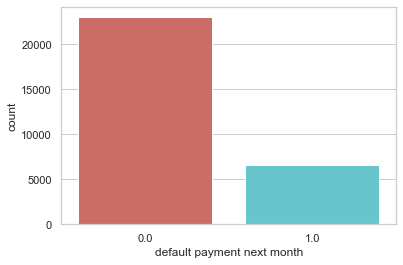

In [13]:
sns.countplot(x='default payment next month',data=df,palette='hls')
plt.show()

In [14]:
count_no_sub = len(df[df['default payment next month']==0])
count_sub = len(df[df['default payment next month']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 77.68656464308638
percentage of subscription 22.31343535691362


Our default payment of next month are imbalanced, and the ratio of unpaid to paid is 78:22. 

In [15]:
df.groupby('default payment next month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,,,,
0.0,15034.41068,178299.965211,1.613628,1.796791,1.562924,35.392851,0.195860,0.181162,0.184641,0.150896,...,47303.106975,43448.517133,40438.090233,39028.741129,6305.575317,6616.275657,5728.758915,5308.696860,5253.151852,5689.407071
1.0,14753.63028,130125.311128,1.566843,1.880545,1.529447,35.712036,0.923997,0.814686,0.731718,0.644815,...,45062.736109,41987.680091,39530.363361,38265.562755,3365.575322,3382.854807,3351.971083,3157.358062,3200.042998,3412.390159


Observations:
There is a significant difference in LIMIT_BAL, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6.
For Given credit (LIMIT_BAL), the unpaid group is higher than paid group.
For history of past payment(PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6), the paid group is higher than unpaid group, which means that the paid group have a better credit score.
For the amount of previous payment(PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6), it shows the total amount that the person had paid, the unpaid group is higher than paid group, it shows that unpaid group spent more money.

Over-sampling using SMOTE

In [16]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
X = df.loc[:, df.columns != 'default payment next month']
y = df.loc[:, df.columns == 'default payment next month']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of paid in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of unpaid",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of paid data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of unpaid data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32096
Number of paid in oversampled data 16048
Number of unpaid 16048
Proportion of paid data in oversampled data is  0.5
Proportion of unpaid data in oversampled data is  0.5


Now we have a balanced data. I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True False False False False False False
  True  True False  True  True False  True  True  True  True  True  True]
[1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1]


/Users/jingwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
cols=['EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT4'] 
X=os_data_X[cols]
y=os_data_y['default payment next month']

The RFE has helped us select the following features: 'EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT4'

Implementing the model

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.567622
         Iterations 7
                              Results: Logit
Model:              Logit                      Pseudo R-squared: 0.181     
Dependent Variable: default payment next month AIC:              36458.7729
Date:               2022-04-29 13:42           BIC:              36550.9143
No. Observations:   32096                      Log-Likelihood:   -18218.   
Df Model:           10                         LL-Null:          -22247.   
Df Residuals:       32085                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
EDUCATIO

All P-value is smaller than 0.05, it means that all factors above are significant.

Logistic Regression Model Fitting

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4042  749]
 [1866 2972]]


The result is telling us that we have 4042+2972 correct predictions and 1866+749 incorrect predictions.

Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.76      4791
         1.0       0.80      0.61      0.69      4838

    accuracy                           0.73      9629
   macro avg       0.74      0.73      0.73      9629
weighted avg       0.74      0.73      0.72      9629



Interpretation: Of the entire test set, 73% of the prediction are accurated

ROC Curve

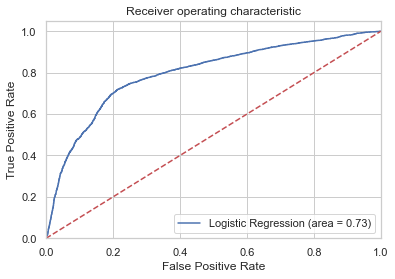

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).From the ROC curve, we can say our model fit quite well.